Name : Ritwiz Singh

Roll Number : 20/CSE/129

U.N. Roll No : 10300120129

![Question 1](Q1.png)

# Installing Required Libraries

In [ ]:
!pip install numpy pandas seaborn scikit-learn matplotlib

## Importing Dependencies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline

## Implementation

In [2]:
iris = datasets.load_iris()
df = pd.DataFrame(data = np.c_[iris['data'], iris['target']],
                 columns = iris['feature_names']+ ['target'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [3]:
# since we don't need petal width and petal length, we will drop those two columns. 

df = df.drop(['petal length (cm)','petal width (cm)'], axis = 1)
df.head()

,sepal length (cm),sepal width (cm),target
0,5.1,3.5,0.0
1,4.9,3.0,0.0
2,4.7,3.2,0.0
3,4.6,3.1,0.0
4,5.0,3.6,0.0


## Exploring the dataset

In [4]:
df['target'].value_counts()

target
0.0    50
1.0    50
2.0    50
Name: count, dtype: int64

In [5]:
class_mapping = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}

# Replace numeric labels with class names
df['target'] = df['target'].map(class_mapping)
df.head()

,sepal length (cm),sepal width (cm),target
0,5.1,3.5,setosa
1,4.9,3.0,setosa
2,4.7,3.2,setosa
3,4.6,3.1,setosa
4,5.0,3.6,setosa


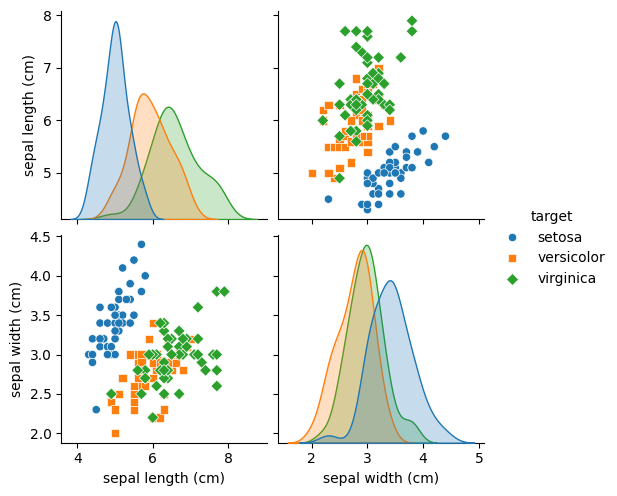

In [6]:
sns.pairplot(df, hue='target', markers=["o", "s", "D"])
plt.show()

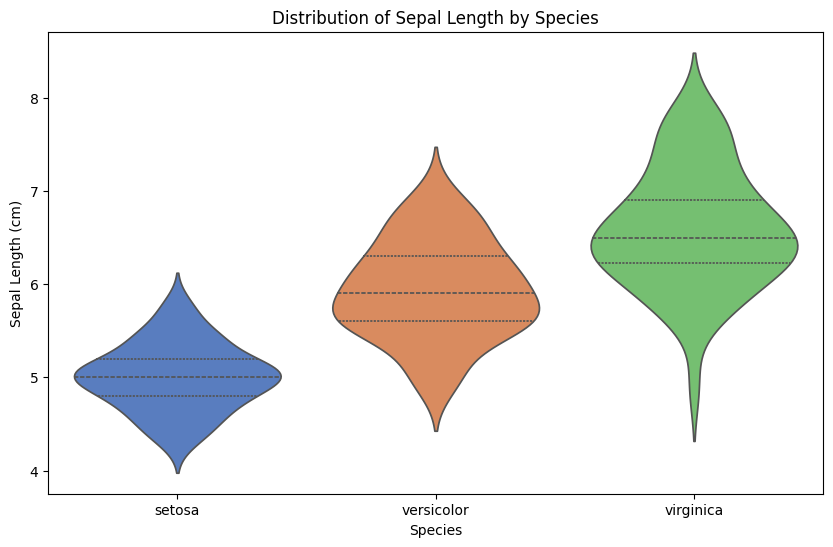

In [7]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='target', y='sepal length (cm)', data=df, inner='quart', hue='target', palette='muted')
plt.xlabel('Species')
plt.ylabel('Sepal Length (cm)')
plt.title('Distribution of Sepal Length by Species')
plt.show()

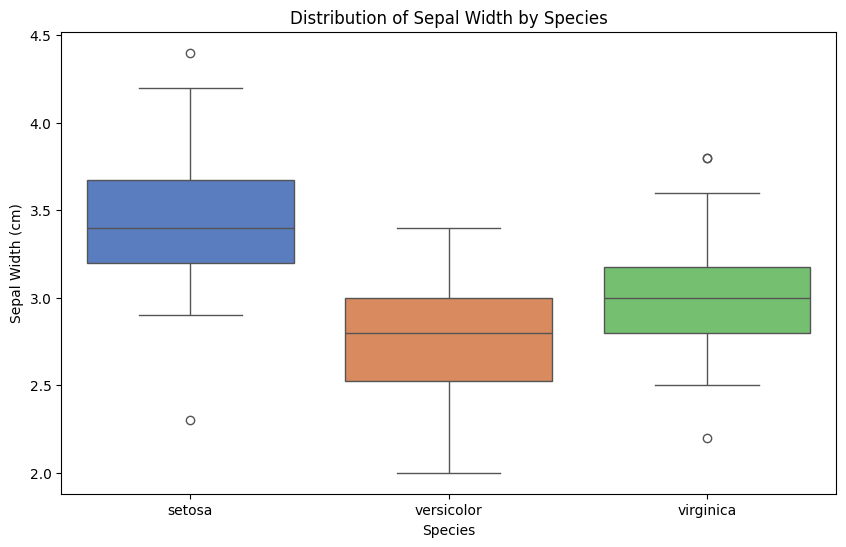

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='sepal width (cm)', data=df, hue='target', palette='muted')
plt.xlabel('Species')
plt.ylabel('Sepal Width (cm)')
plt.title('Distribution of Sepal Width by Species')
plt.show()

## Preprocessing & Training 

In [8]:
X = df.drop(columns=['target'])  # Features
y = df['target']  # Target

In [9]:
# Divide our df into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
model = KNeighborsClassifier(n_neighbors=3)

In [11]:
model.fit(X_train, y_train) 

KNeighborsClassifier(n_neighbors=3)

## Testing and Evaluating Metrics 

In [12]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)

In [13]:
# Calculate accuracy

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 0.76%


In [14]:
# Generate a classification report

class_report = classification_report(y_test, y_pred, target_names=df['target'].unique())
print("Classification Report:\n\n", class_report)

Classification Report:

               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.58      0.54      0.56        13
   virginica       0.57      0.62      0.59        13

    accuracy                           0.76        45
   macro avg       0.72      0.72      0.72        45
weighted avg       0.76      0.76      0.76        45



In [15]:
# Generate a confusion matrix

confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n\n", confusion_mat)

Confusion Matrix:

 [[19  0  0]
 [ 0  7  6]
 [ 0  5  8]]


## Finding the prediction for the given question statement

In [16]:
test_case = np.array([[5.2, 3.1]])

predicted_class = model.predict(test_case)
print("Predicted Class:", predicted_class[0].capitalize())

Predicted Class: Setosa


/media/ritwiz/Code1/Jupyter-Workspace/new_env/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


## How to improve our accuracy while predicting 

By using high value of n_neigbour, we can see substantial increase in the predictions of our model

In [17]:
model1 = KNeighborsClassifier(n_neighbors=9) # new neighbor count = 9

In [18]:
model1.fit(X_train, y_train) 

KNeighborsClassifier(n_neighbors=9)

In [19]:
y_pred1 = model1.predict(X_test)

In [20]:
# Calculate accuracy

accuracy1 = accuracy_score(y_test, y_pred1)
print(f"Accuracy: {accuracy1:.2f}%")

Accuracy: 0.80%


In [21]:
# Generate a classification report

class_report1 = classification_report(y_test, y_pred1, target_names=df['target'].unique())
print("Classification Report:\n\n", class_report1)

Classification Report:

               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.67      0.62      0.64        13
   virginica       0.64      0.69      0.67        13

    accuracy                           0.80        45
   macro avg       0.77      0.77      0.77        45
weighted avg       0.80      0.80      0.80        45



In [22]:
# Generate a confusion matrix

confusion_mat1 = confusion_matrix(y_test, y_pred1)
print("Confusion Matrix:\n\n", confusion_mat1)

Confusion Matrix:

 [[19  0  0]
 [ 0  8  5]
 [ 0  4  9]]


In [23]:
test_case = np.array([[5.2, 3.1]])

predicted_class = model1.predict(test_case)
print("Predicted Class:", predicted_class[0].capitalize())

Predicted Class: Setosa


/media/ritwiz/Code1/Jupyter-Workspace/new_env/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


![Question 2](Q2.png)

# Load the dataset 

In [76]:
df = pd.read_csv('train.csv') # find the dataset on kaggle - Titanic - Machine Learning from Disaster
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


![Details about Dataset](Notes.png)

## Exploring the dataset

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We can see that there are some NaN values for features - "Age" and "Cabin". We can visualize the same using seaborn as following.

<Axes: >

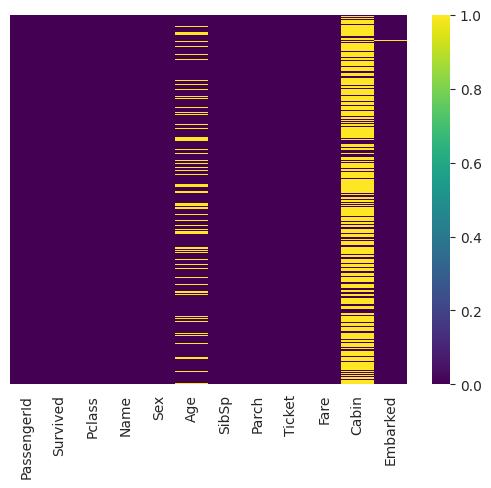

In [78]:
sns.heatmap(df.isnull(), yticklabels= False, cbar=True, cmap='viridis')

The isnull() function returns True or False (0/1), as we can see, the values for Age and Cabin are null hence we get True(1) for those rows and is represented by yellow.

We will fill these values (for Age) instead of dropping them from the table, so that we donot miss out of nearly 20% of our dataset. This will help us in developing a better model. Lets take a look at the relation between Pclass and Age and fill the values as needed.

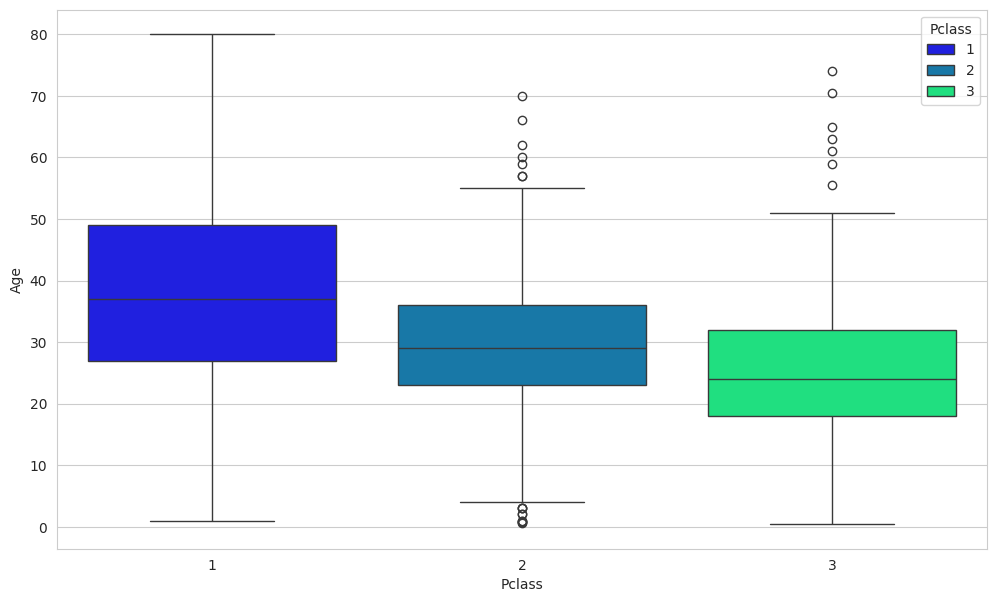

In [79]:
sns.set_style('whitegrid')
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass', y='Age', hue='Pclass', data = df, palette = 'winter')
plt.show()

Looking at the plot above, we can say that the average value for Class 1 is somewhere around 37,
Class 2 is around 29 and for Class 3 is around 24. 

## Data Cleaning

In [80]:
def calculate_age(cols):
    
    Age = cols['Age']
    Pclass = cols['Pclass']

    if pd.isnull(Age):
        if Pclass == 1:
            return 37.0
        elif Pclass == 2:
            return 29.0
        elif Pclass == 3:
            return 24.0
    else:
        return Age

In [81]:
# Applying the function on our dataset

df['Age'] = df[['Age', 'Pclass']].apply(calculate_age, axis=1)

<Axes: >

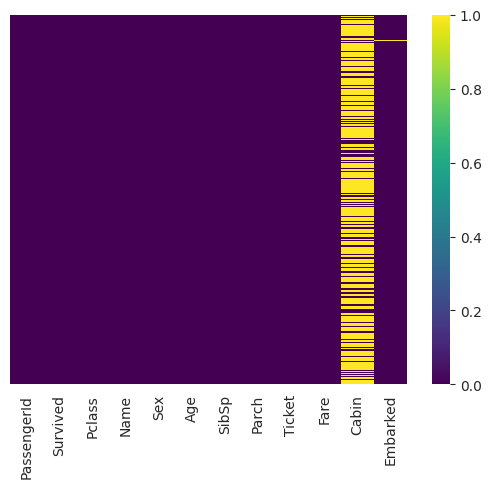

In [82]:
# Checking for Age's NaN values after cleaning it

sns.heatmap(df.isnull(), yticklabels= False, cbar=True, cmap='viridis')

In [83]:
df.drop(['Name', 'PassengerId', 'Ticket', 'Cabin'], axis=1, inplace=True)

## Dealing with Categorical Values

In [84]:
sex = pd.get_dummies(df['Sex'], drop_first = True)
embark = pd.get_dummies(df['Embarked'], drop_first = True)

In [85]:
df.drop(['Sex', 'Embarked'], axis=1, inplace=True)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [86]:
df = pd.concat([df,sex,embark],axis=1) # add the columns we created back into our dataframe
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   male      891 non-null    bool   
 7   Q         891 non-null    bool   
 8   S         891 non-null    bool   
dtypes: bool(3), float64(2), int64(4)
memory usage: 44.5 KB


## Visualisation of the data at hand

<Axes: xlabel='Survived', ylabel='count'>

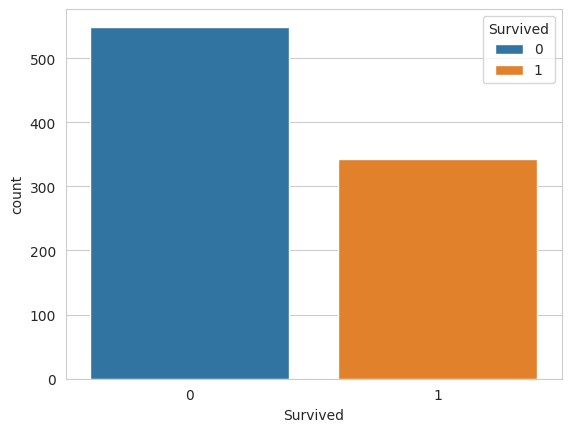

In [90]:
sns.countplot(x='Survived', data = df, hue= 'Survived')

We can see that more people lost their lives than the ones who survived.

<Axes: xlabel='Survived', ylabel='count'>

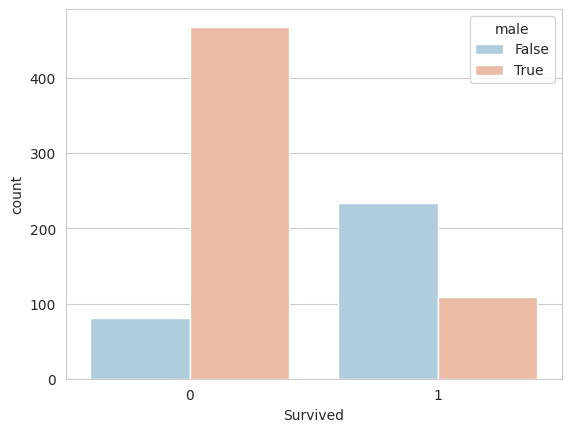

In [73]:
sns.countplot(x='Survived', hue = 'male', data = df, palette = 'RdBu_r')

On further exploration we see that amongst the ones who died, the number of males was significantly higher than that of females and vice versa in case of people who survived. 

<Axes: xlabel='Survived', ylabel='count'>

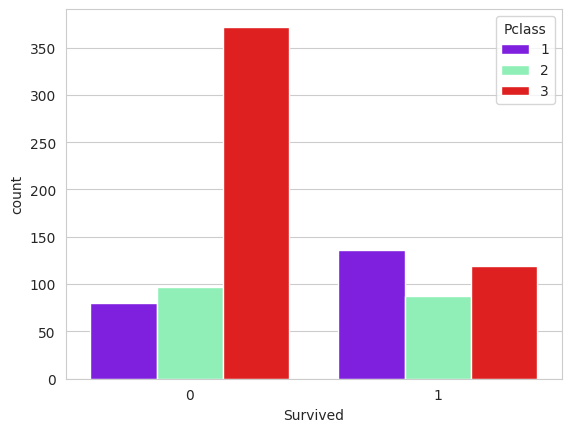

In [91]:
sns.countplot(x='Survived', hue = 'Pclass', data = df, palette = 'rainbow')

It is evident from the plot above that more people travelling 3rd class died than the combined total of class 1 and 2.

## Model Building and Training

In [105]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [98]:
X = df.drop(['Survived'], axis =1)
y = df['Survived']

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [100]:
model = GaussianNB()

In [102]:
model.fit(X_train,y_train)

GaussianNB()

## Testing and Evaluating Metrics

In [103]:
y_pred = model.predict(X_test)

In [106]:
# Calculate accuracy

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 0.77%


In [110]:
# Classification report 

class_report = classification_report(y_test, y_pred)
print("Classification Report:\n\n", class_report)

Classification Report:

               precision    recall  f1-score   support

           0       0.81      0.80      0.80       105
           1       0.72      0.73      0.72        74

    accuracy                           0.77       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.77      0.77      0.77       179



In [111]:
# Confusion matrix

confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n\n", confusion_mat)

Confusion Matrix:

 [[84 21]
 [20 54]]


## Save the classifier model

In [151]:
import pickle

with open('naive_bayes_classifier.pkl', 'wb') as file:
    pickle.dump(model, file)

![Question 3](Q3.png)

# Load the dataset

Dataset Link - https://www.kaggle.com/datasets/pablomgomez21/drugs-a-b-c-x-y-for-decision-trees/data

In [202]:
df = pd.read_csv('drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


## Exploring the dataset

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


No null values in any column. Proceeding with visaulizations

## Visualization 

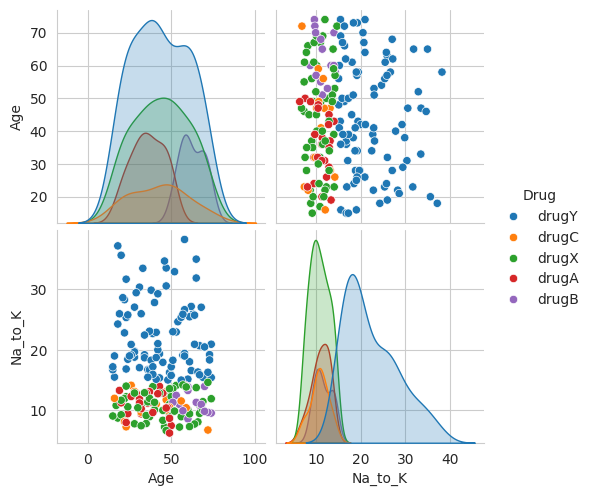

In [156]:
sns.pairplot(data=df, hue='Drug')

<Axes: xlabel='BP', ylabel='count'>

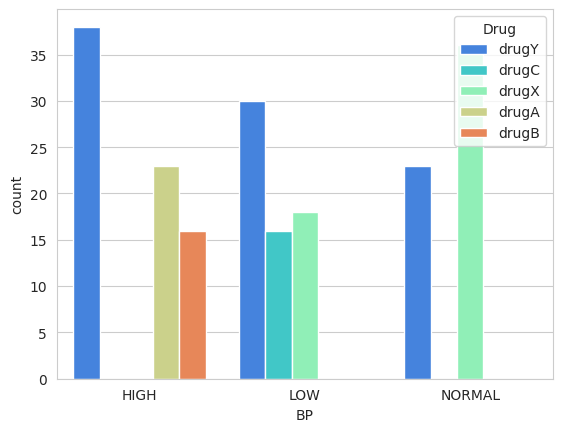

In [164]:
sns.countplot(x='BP', hue = 'Drug', data = df, palette = 'rainbow')

<Axes: xlabel='Cholesterol', ylabel='count'>

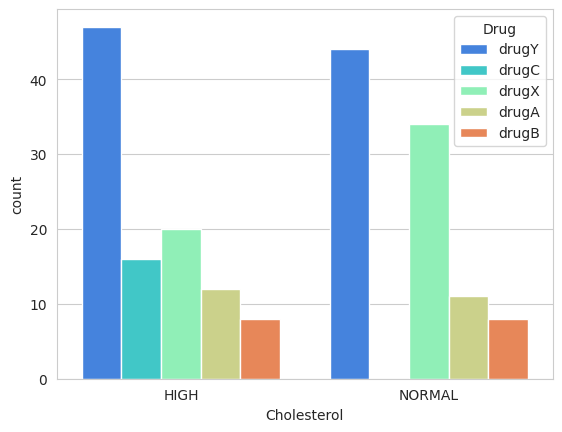

In [171]:
sns.countplot(x='Cholesterol', hue = 'Drug', data = df, palette = 'rainbow')

## Dealing with Categorical Features

In [203]:
df.describe(include='O') # Categorical Features

,Sex,BP,Cholesterol,Drug
count,200,200,200,200
unique,2,3,2,5
top,M,HIGH,HIGH,drugY
freq,104,77,103,91


In [204]:
df['BP'].unique()

array(['HIGH', 'LOW', 'NORMAL'], dtype=object)

In [205]:
df['Cholesterol'].unique()

array(['HIGH', 'NORMAL'], dtype=object)

In [206]:
df['Sex'].unique()

array(['F', 'M'], dtype=object)

In [207]:
df['Drug'].unique()

array(['drugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

### Transforming the categorical features

In [208]:
bp_mapping = {'LOW': 0, 'NORMAL': 1, 'HIGH': 2}
ch_mapping = {'HIGH': 1, 'NORMAL': 0}
sex_mapping = {'M': 0, 'F': 1}
drug_mapping = {
    "drugA": 0,
    "drugB" : 1,
    "drugC": 2,
    "drugX" :3,
    "drugY": 4
}

In [209]:
df['BP'] = df['BP'].map(bp_mapping)
df['Cholesterol'] = df['Cholesterol'].map(ch_mapping)
df['Sex'] = df['Sex'].map(sex_mapping)
df['Drug'] = df['Drug'].map(drug_mapping)

In [210]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,1,2,1,25.355,4
1,47,0,0,1,13.093,2
2,47,0,0,1,10.114,2
3,28,1,1,1,7.798,3
4,61,1,0,1,18.043,4


## Model Building and Training

In [215]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [211]:
X = df.drop(columns='Drug')
y = df['Drug']

In [214]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

In [216]:
model = DecisionTreeClassifier()

In [217]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

## Testing & Evaluating Metrics

In [218]:
y_pred = model.predict(X_test)

In [226]:
# Calculate accuracy

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {(accuracy*100):.2f}%")

Accuracy: 100.00%


In [227]:
# Classification report 

class_report = classification_report(y_test, y_pred)
print("Classification Report:\n\n", class_report)

Classification Report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00        15

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



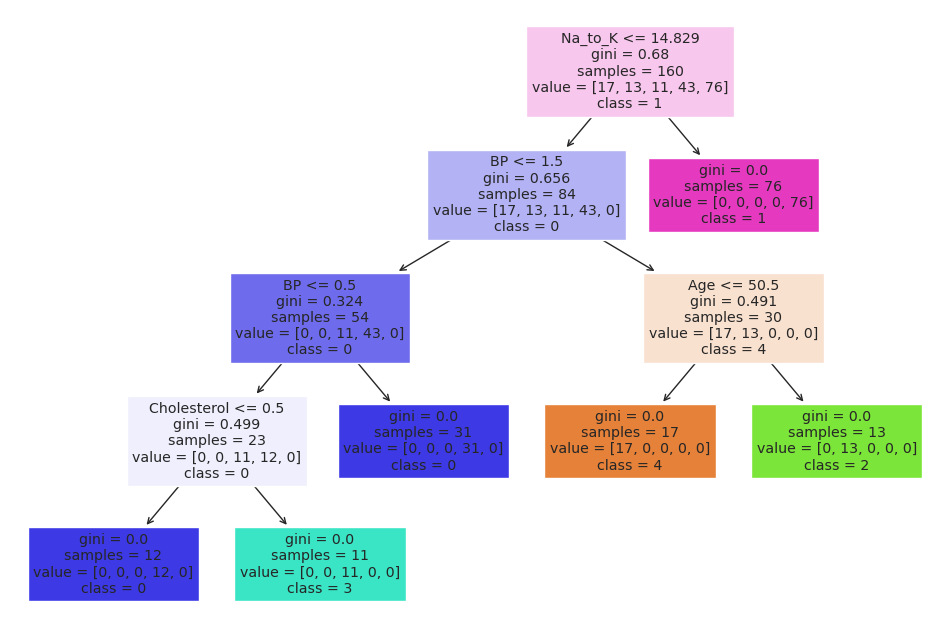

In [231]:
# Visualize the Decision Tree

plt.figure(figsize=(12, 8))
tree.plot_tree(model, feature_names=df.columns, class_names= df['Drug'].unique().astype(str), filled=True)
plt.show()

## Save the classifier model

In [232]:
import pickle

with open('decision_tree_classifier.pkl', 'wb') as file:
    pickle.dump(model, file)

![Question 4](Q4.png)

# Load the dataset

Dataset Link - https://www.kaggle.com/datasets/vijayaadithyanvg/rock-or-mine-classification

In [250]:
df = pd.read_csv('ROCK_OR_MINE.csv')
df.head()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R


In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0.0200  207 non-null    float64
 1   0.0371  207 non-null    float64
 2   0.0428  207 non-null    float64
 3   0.0207  207 non-null    float64
 4   0.0954  207 non-null    float64
 5   0.0986  207 non-null    float64
 6   0.1539  207 non-null    float64
 7   0.1601  207 non-null    float64
 8   0.3109  207 non-null    float64
 9   0.2111  207 non-null    float64
 10  0.1609  207 non-null    float64
 11  0.1582  207 non-null    float64
 12  0.2238  207 non-null    float64
 13  0.0645  207 non-null    float64
 14  0.0660  207 non-null    float64
 15  0.2273  207 non-null    float64
 16  0.3100  207 non-null    float64
 17  0.2999  207 non-null    float64
 18  0.5078  207 non-null    float64
 19  0.4797  207 non-null    float64
 20  0.5783  207 non-null    float64
 21  0.5071  207 non-null    float64
 22  0.

<Axes: >

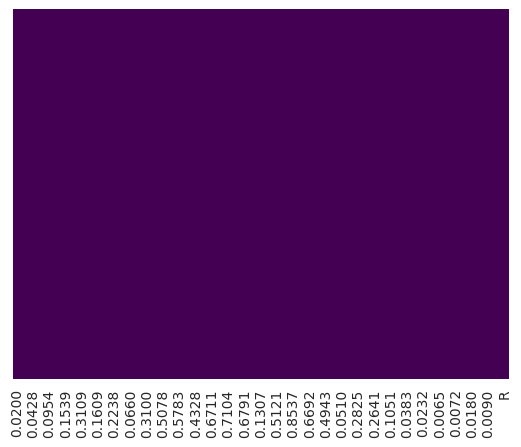

In [252]:
# Checking for null values

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

No null values present. We will proceed with converting the categorical values.

## Dealing with categorical values

In [253]:
df.describe(include='O')

,R
count,207
unique,2
top,M
freq,111


In [254]:
df['R'].unique()

array(['R', 'M'], dtype=object)

In [255]:
def helper(val):
    if val == 'R':
        return 0
    elif val == 'M':
        return 1

In [256]:
df['R'] = df['R'].map(helper)

In [257]:
df.rename(columns = {'R':'isMine'}, inplace = True)

In [258]:
df.tail(2)

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,isMine
205,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,1
206,0.0260,0.0363,0.0136,0.0272,0.0214,0.0338,0.0655,0.1400,0.1843,0.2354,...,0.0146,0.0129,0.0047,0.0039,0.0061,0.0040,0.0036,0.0061,0.0115,1


## Model Building and Training

In [303]:
 from sklearn.svm import SVC

In [304]:
X = df.iloc[:, 0:60] # Features
y = df.iloc[:,60] # Target

In [305]:
X.head(1) , y.head(2)

(   0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109  \
 0  0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
 
    0.2111  ...  0.0232  0.0027  0.0065  0.0159  0.0072  0.0167  0.0180  \
 0  0.2872  ...  0.0125  0.0084  0.0089  0.0048  0.0094  0.0191   0.014   
 
    0.0084  0.0090  0.0032  
 0  0.0049  0.0052  0.0044  
 
 [1 rows x 60 columns],
 0    0
 1    0
 Name: isMine, dtype: int64)

In [306]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)

### Understanding the different types of SVM 

Two common types of SVM kernels are the Radial Basis Function (RBF) kernel and the linear kernel. The key differences between SVMs with RBF and linear kernels are as following:

**Kernel Type:**

*Linear SVM:*  The linear SVM uses a linear kernel, which means it assumes that the data can be separated by a straight line (in 2D), a hyperplane (in higher dimensions) in feature space.

*RBF SVM:*  The RBF SVM uses a Radial Basis Function (RBF) kernel, also known as the Gaussian kernel. The RBF kernel can capture more complex, nonlinear relationships between data points.


**Linearity:**

*Linear SVM:*  It works well when the data is linearly separable, meaning that a single straight line or hyperplane can effectively separate the classes.

*RBF SVM:*  It is capable of modeling both linear and nonlinear relationships between data points. It can handle complex decision boundaries by transforming the data into a higher-dimensional space.


**Complexity:**

*Linear SVM:*  Linear SVMs are computationally less complex and faster to train compared to RBF SVMs. They are often preferred when the number of features is high and the dataset is large.

*RBF SVM:*   RBF SVMs are computationally more expensive and can be slower to train, especially when dealing with large datasets. The RBF kernel introduces a parameter (gamma) that controls the shape of the decision boundary, and tuning this parameter is essential for optimal performance.

### Models

In [307]:
model_lin = SVC(kernel='linear')
model_lin.fit(X_train,y_train)

SVC(kernel='linear')

In [308]:
model_rbf = SVC(C = 10, gamma = 'scale', kernel = 'rbf')
model_rbf.fit(X_train,y_train)

SVC(C=10)

## Testing & Evaluating Metrics

In [309]:
y_pred_linear = model_lin.predict(X_test)

In [310]:
# Calculate accuracy

accuracy = accuracy_score(y_test, y_pred_linear)
print(f"Accuracy: {(accuracy*100):.2f}%")

Accuracy: 76.19%


In [311]:
# Classification report 

class_report = classification_report(y_test, y_pred_linear)
print("Classification Report:\n\n", class_report)

Classification Report:

               precision    recall  f1-score   support

           0       0.62      0.87      0.72        15
           1       0.90      0.70      0.79        27

    accuracy                           0.76        42
   macro avg       0.76      0.79      0.76        42
weighted avg       0.80      0.76      0.77        42



In [312]:
y_pred_rbf = model_rbf.predict(X_test)

In [313]:
# Calculate accuracy

accuracy = accuracy_score(y_test, y_pred_rbf)
print(f"Accuracy: {(accuracy*100):.2f}%")

Accuracy: 78.57%


In [314]:
# Classification report 

class_report = classification_report(y_test, y_pred_rbf)
print("Classification Report:\n\n", class_report)

Classification Report:

               precision    recall  f1-score   support

           0       0.69      0.73      0.71        15
           1       0.85      0.81      0.83        27

    accuracy                           0.79        42
   macro avg       0.77      0.77      0.77        42
weighted avg       0.79      0.79      0.79        42



The SVM RBF model performs better than the linear svm model and can be used for prediction.

## Save the classifier model

In [315]:
import pickle

with open('svm_classifier.pkl', 'wb') as file:
    pickle.dump(model_rbf, file)